In [2]:
%pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 MB 8.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 10.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=aef743ccaf45e7ca8180b0192b9a3e01e93ac17bfe542624f9866319d0d57be3
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/f4/4b/8b/a9c23da464a09c6ad0a131c1752079bc85f9f1677c7b78e87d
Successfully built imutils

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install matplotlib
%pip install mpl_toolkits


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/9g/ts13wrs51x736gkgsckq_3f40000gp/T/ipykernel_50778/1909666395.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


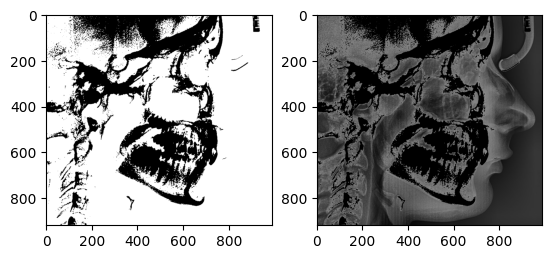

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math


img = cv2.imread('cutted.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

hsvImg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

lightSelector = (0, 0, 0)
darkSelector = (140, 140, 140)

mask = cv2.inRange(hsvImg, lightSelector, darkSelector)
result = cv2.bitwise_and(img, img, mask = mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap = "gray")
cv2.imwrite('mask.jpg', mask)

plt.subplot(1, 2, 2)
plt.imshow(result)

plt.show()

ORIGINAL:


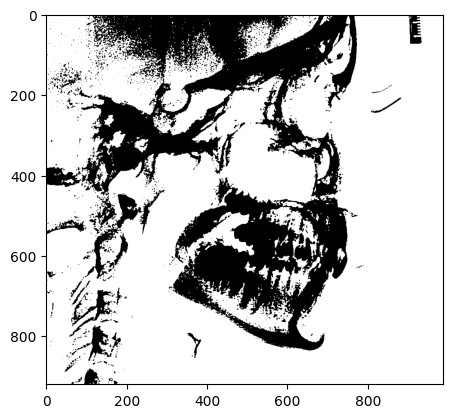

In [11]:
# Noice reduction
dst = cv2.fastNlMeansDenoising(mask, None, 5, 13, 31)

print('ORIGINAL:')
plt.imshow(mask, cmap = "gray")
plt.show()

extreme ponits:  (0, 381) (768, 10) (107, 0) (635, 835)


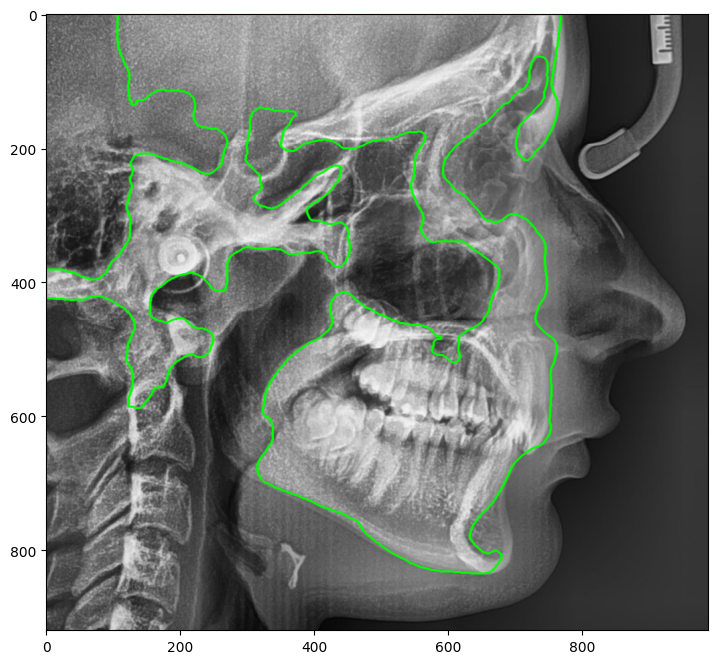

In [12]:
import imutils

# Prepocess
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 45)
flag, thresh = cv2.threshold(blur, 125, 220, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, None, iterations = 2)
thresh = cv2.dilate(thresh, None, iterations = 2)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# contours = sorted(contours, key=cv2.contourArea, reverse=True)
contours = max(contours, key = cv2.contourArea)

imgCopy = img.copy()
cv2.drawContours(imgCopy, contours, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.figure(figsize = (10, 8), dpi = 100)
plt.imshow(imgCopy)

# determine the most extreme points along the contour
extLeft = tuple(contours[contours[:, :, 0].argmin()][0])
extRight = tuple(contours[contours[:, :, 0].argmax()][0])
extTop = tuple(contours[contours[:, :, 1].argmin()][0])
extBot = tuple(contours[contours[:, :, 1].argmax()][0])

print('extreme ponits: ', extLeft, extRight, extTop, extBot)

True

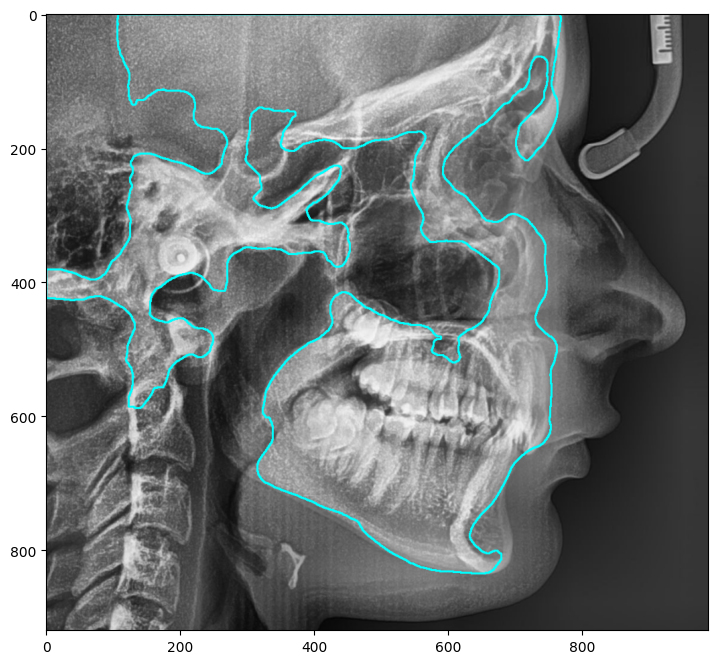

In [13]:
# Select long perimeters only
perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
listindex =[i for i in range(15) if perimeters[i]>perimeters[0]/2]
numcards =len(listindex)

# Show image
imgcont = img.copy()
# [cv2.drawContours(imgcont, [contours[i]], 0, (255,255,0), 5) for i in listindex]
cv2.drawContours(imgcont, [contours], -1, (0, 255, 255), 2)
plt.figure(figsize = (10, 8), dpi = 100)
plt.imshow(imgcont)
cv2.imwrite('withContours.jpg', imgcont)

In [15]:
%pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 9.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 9.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[[[675 379]]

 [[607 520]]

 [[432 420]]

 [[328 562]]

 [[315 682]]

 [[544 820]]

 [[667 830]]

 [[634 769]]

 [[753 620]]

 [[745 344]]

 [[592 228]]

 [[732  63]]

 [[701 197]]

 [[742 194]]

 [[767   0]]]


True

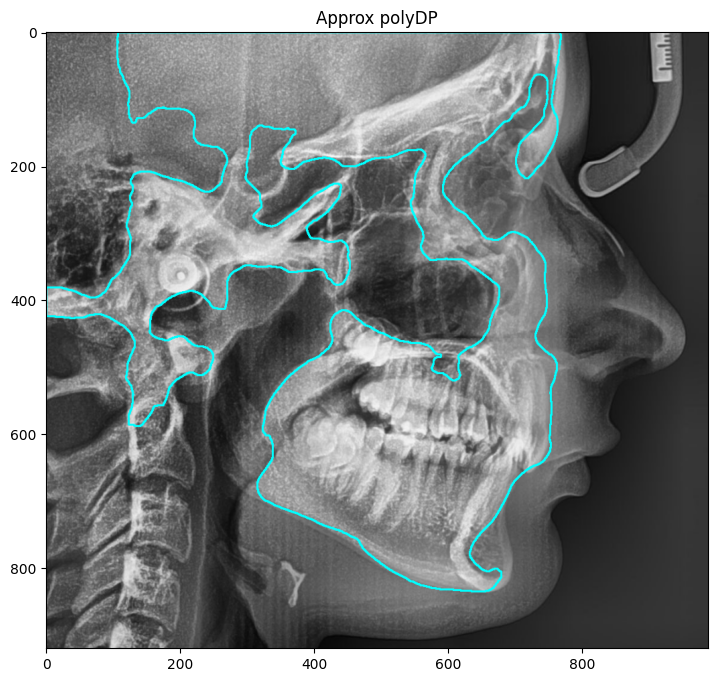

In [16]:
import csv
from pandas import read_csv as pandasReadCSV
from pandas import concat as pdConcat
from pandas import DataFrame
from pandas import Series

alphabeticList = [
    'EA',
    'EB',
    'EC',
    'ED',
    'EE',
    'EF',
    'EG',
    'EH',
    'EI',
    'EJ',
    'EK',
    'EL',
    'EM',
    'EN',
]
# Approximating Contours and Finding their Convex hull
accuracy = 0.005 * cv2.arcLength(contours, True)
approx = cv2.approxPolyDP(contours, accuracy, True)
approxShortened = approx[25:]
print(approxShortened)

with open('EmptyApproxPoints.csv', 'w', newline = '') as file:
    myWriter = csv.writer(file, delimiter = ',')
    myWriter.writerows(approxShortened)

dataFrame = pandasReadCSV('EmptyApproxPoints.csv')
dataFrame['Names'] = Series(alphabeticList)
dataFrame.to_csv('approxNamedPoints.csv', index = False)

imgPolyDP = imgcont.copy()
cv2.drawContours(imgcont, [approxShortened], 0, (0,255,0), 2)
plt.figure(figsize = (10, 8), dpi = 100)
plt.title('Approx polyDP')
plt.imshow(imgPolyDP)
cv2.imwrite('withApproxPolyDP.jpg', imgPolyDP)

58.397 градусов: N-PM-Xi


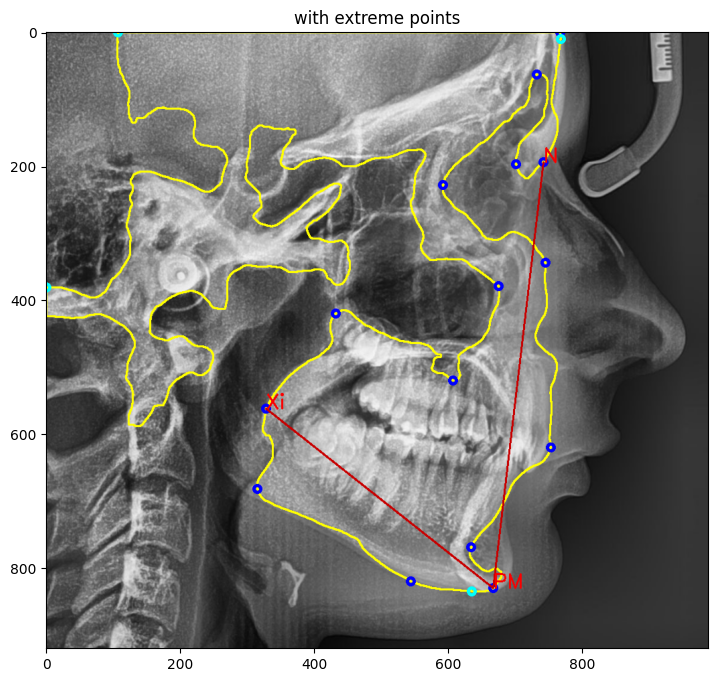

In [18]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal

from math import atan


def slope(x1, y1, x2, y2):
    return (float)(y2-y1)/(x2-x1)

def findAngle(M1, M2, text = ''):
    PI = 3.14159265
    angle = abs((M2 - M1) / (1 + M1 * M2))
    ret = atan(angle)
    val = (ret * 180) / PI
    print(round(val, 4), text)

FONT_HERSHEY_SIMPLEX = cv2.FONT_HERSHEY_SIMPLEX

imgCopyForExtremePoints = imgPolyDP.copy()
completeImageToPlot = cv2.cvtColor(imgCopyForExtremePoints, cv2.COLOR_BGR2RGB)

circlesArr = [extLeft, extRight, extTop, extBot]
for circleToDraw in approxShortened:
    cv2.circle(completeImageToPlot, (circleToDraw[0][0], circleToDraw[0][1]), 5, (0, 0, 255), 3) # Center
    for extremeCircle in circlesArr:
        cv2.circle(completeImageToPlot, extremeCircle, 5, (0, 255, 255), 3) # Center
    pass

# Example line: N-PM
x1 = approxShortened[len(approxShortened) - 2].ravel()[0]
y1 = approxShortened[len(approxShortened) - 2].ravel()[1]
x2 = approxShortened[len(approxShortened) - 9].ravel()[0]
y2 = approxShortened[len(approxShortened) - 9].ravel()[1]
cv2.line(completeImageToPlot, (x1, y1), (x2, y2), (200, 0, 0), thickness = 2, lineType = 8)
cv2.putText(completeImageToPlot, 'N', (x1, y1), FONT_HERSHEY_SIMPLEX, 1, (250, 0, 0), 2, lineType = 8)
cv2.putText(completeImageToPlot, 'PM', (x2, y2), FONT_HERSHEY_SIMPLEX, 1, (250, 0, 0), 2, lineType = 8)

# Example line: PM-Xi
x4 = approxShortened[len(approxShortened) - 12].ravel()[0]
y4 = approxShortened[len(approxShortened) - 12].ravel()[1]
cv2.line(completeImageToPlot, (x2, y2), (x4, y4), (200, 0, 0), thickness = 2, lineType = 8)
cv2.putText(completeImageToPlot, 'Xi', (x4, y4), FONT_HERSHEY_SIMPLEX, 1, (250, 0, 0), 2, lineType = 8)

M1 = slope(x1, y1, x2, y2)
M2 = slope(x2, y2, x4, y4)
findAngle(M1, M2, 'градусов: N-PM-Xi')

plt.figure(figsize = (10,8), dpi = 100)
plt.title('with extreme points')

plt.imshow(completeImageToPlot)
plt.show()